# Group 5: Body Fat Data Project

The goal is to come up with a simple, precise and accurate way of determining body fat percentage of males based on readily available clinical measurements. 

The data set contains measurements from 252 men who had their body fat percentage accurately measured via underwater weighing. 

This notebook covers a Python-based solution for the module 1 exercise of the Data Science Practium class.

## Step 1: Analyzing Raw Data

In this step, we want to check duplicate data, fix and amend badly-formatted, incorrect and amend incomplete data from original file.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
%matplotlib inline

In [2]:
# load data and set IDNO as index
data = pd.read_csv('./BodyFat.csv', index_col = 0)
data.head()

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
IDNO,,,,,,,,,,,,,,,,
1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [3]:
# check for duplicate data
data[data.duplicated(keep=False)]

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
IDNO,,,,,,,,,,,,,,,,


In [4]:
# check for missing data
data.isnull().sum()

BODYFAT      0
DENSITY      0
AGE          0
WEIGHT       0
HEIGHT       0
ADIPOSITY    0
NECK         0
CHEST        0
ABDOMEN      0
HIP          0
THIGH        0
KNEE         0
ANKLE        0
BICEPS       0
FOREARM      0
WRIST        0
dtype: int64

In [5]:
data.describe()

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,18.938492,1.055574,44.884921,178.924405,70.148810,25.436905,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,7.750856,0.019031,12.602040,29.389160,3.662856,3.648111,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.000000,0.995000,22.000000,118.500000,29.500000,18.100000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,12.800000,1.041400,35.750000,159.000000,68.250000,23.100000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,19.000000,1.054900,43.000000,176.500000,70.000000,25.050000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,24.600000,1.070400,54.000000,197.000000,72.250000,27.325000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,45.100000,1.108900,81.000000,363.150000,77.750000,48.900000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


From the description table, we can see that there may have some outliers. For example, the minimum value of bodyfat is 0. 

Let's plot it to get a better idea of what the data looks like.

Text(0, 0.5, 'Frequency')

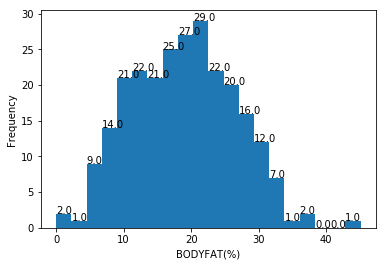

In [6]:
hist = plt.hist(data.BODYFAT, bins=20)
for i in range(0,20):
    plt.text(hist[1][i], hist[0][i], str(hist[0][i]))
plt.xlabel('BODYFAT(%)')
plt.ylabel('Frequency')

It seems like that we don't need do variable transformation and majority of individuals have a healthy body fat percentage.

### The relationship between BODYFAT and DENSITY
According to Siri's equation, we want to check the linear relationship between DENSITY and BODYFAT. In the meanwhile, this linear relationship can help us identify some incorrect values.

Text(0.5, 1.0, 'DENSITY vs BODYFAT(%)')

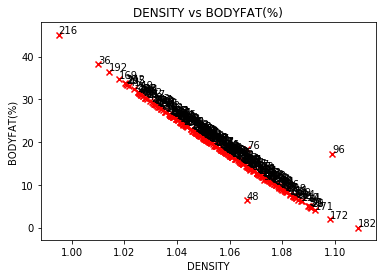

In [7]:
# check the incorrect data points
## relationship of BODYFAT and DENSITY
for i,index in enumerate(data.index):
    x = data.DENSITY.values[i]
    y = data.BODYFAT.values[i]
    plt.scatter(x, y, marker = 'x', color = 'red')
    plt.text(x, y + 0.3, index)
plt.xlabel('DENSITY')
plt.ylabel('BODYFAT(%)')
plt.title('DENSITY vs BODYFAT(%)')

In [8]:
data.loc[[48,76,96,182]]

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
IDNO,,,,,,,,,,,,,,,,
48,6.4,1.0665,39,148.50,71.25,20.6,34.6,89.8,79.5,92.7,52.7,37.5,21.9,28.8,26.8,17.9
76,18.3,1.0666,61,148.25,67.50,22.9,36.0,91.6,81.8,94.8,54.5,37.0,21.4,29.3,27.0,18.3
96,17.3,1.0991,53,224.50,77.75,26.1,41.1,113.2,99.2,107.5,61.7,42.3,23.2,32.9,30.8,20.4
182,0.0,1.1089,40,118.50,68.00,18.1,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5


No.182 has 0 body fat percentage which is impossible. Suppose his DENSITY is correctly recorded, then according to the fitted line, we impute a negative value of his bodyfat. That's not reasonable. Thus we have to delete this data point.

As for the other three data points, we have no idea about either BODYFAT or DENSITY is correct since their other attributes are in a normal range. So we decided to delete them all.

In [9]:
data = data.drop(index=[48,76,96,182], columns='DENSITY')

### The relationship among ADIPOSTIY, WEIGHT and HEIGHT
ADIPOSITY is also known as BMI, a function of WEIGHT(lbs) and HEIGHT(inches). 

BMI is defined as  
$$BMI = \frac {703\times WEIGHT}{{HEIGHT}^2} $$ 

According to this formula, we can find out those wrongly recorded data.

Text(0.5, 1.0, 'BMI plot')

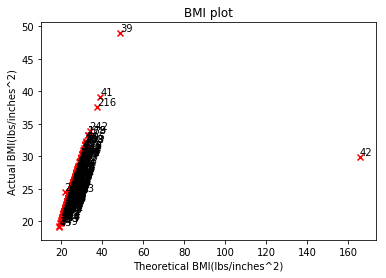

In [10]:
## relationship of ADIPOSITY, WEIGHT, HEIGHT
for i, index in enumerate(data.index):
    x = data.WEIGHT.values[i]/(data.HEIGHT.values[i])**2 * 703
    y = data.ADIPOSITY.values[i]
    plt.scatter(x, y ,marker='x', color='red')
    plt.text(x, y+0.3, index)
plt.xlabel('Theoretical BMI(lbs/inches^2)')
plt.ylabel('Actual BMI(lbs/inches^2)')
plt.title('BMI plot')

The plot above shows that No.42 is an strong influential point. If we dig into the data, we will notice the height of this guy is 29.5 inch but the weight is 205 lbs. The BMI calculated by the formula will be 165.6, which is impossible.

In [11]:
data.loc[[42]]

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
IDNO,,,,,,,,,,,,,,,
42,31.7,44,205.0,29.5,29.9,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4


In [12]:
data = data.drop(index=42)

Text(0.5, 1.0, 'BMI plot')

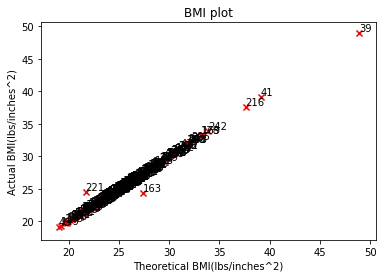

In [13]:
# recheck
for i, index in enumerate(data.index):
    x = data.WEIGHT.values[i]/(data.HEIGHT.values[i])**2 * 703
    y = data.ADIPOSITY.values[i]
    plt.scatter(x, y ,marker='x', color='red')
    plt.text(x, y+0.3, index)
plt.xlabel('Theoretical BMI(lbs/inches^2)')
plt.ylabel('Actual BMI(lbs/inches^2)')
plt.title('BMI plot')

In [14]:
data.loc[[163, 221]]

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
IDNO,,,,,,,,,,,,,,,
163,13.3,33,184.25,68.75,24.4,40.7,98.9,92.1,103.5,64.0,37.3,23.5,33.5,30.6,19.7
221,12.7,54,153.25,70.50,24.5,38.5,99.0,91.8,96.2,57.7,38.1,23.9,31.4,29.9,18.9


Since we have no idea about which variable is incorrect in No.163 and No.221, we decided to delete both data points.

In [15]:
data = data.drop(index=[163,221])

Text(0.5, 1.0, 'BMI plot')

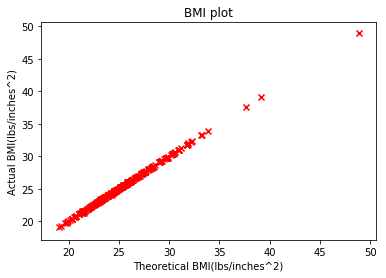

In [16]:
# recheck
for i, index in enumerate(data.index):
    x = data.WEIGHT.values[i]/(data.HEIGHT.values[i])**2 * 703
    y = data.ADIPOSITY.values[i]
    plt.scatter(x, y ,marker='x', color='red')
plt.xlabel('Theoretical BMI(lbs/inches^2)')
plt.ylabel('Actual BMI(lbs/inches^2)')
plt.title('BMI plot')

Now the BMI plot looks better.

### The relationship among ABDOMEN and other variables

We only take ABDOMEN variable as an example.

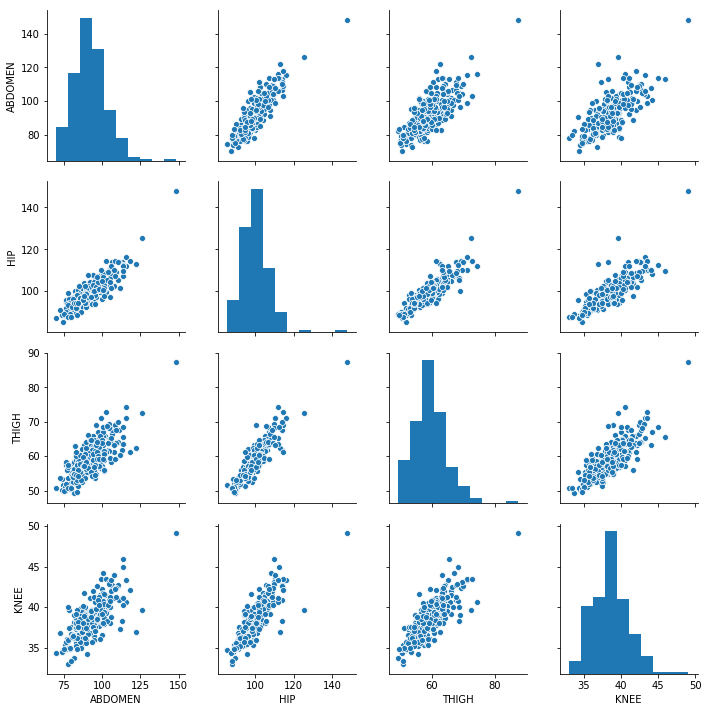

In [17]:
sns.pairplot(data[['ABDOMEN', 'HIP', 'THIGH', 'KNEE']])

As the pairplot shown, there are strong positive correlations among ABDOMEN, HIP, THIGH, KNEE. Hence, we need be careful about the multicollinearity problem.

## Step 2: Model Selection

First, we split the data into training part (80% of the whole data) and test part (20%) in case of overfitting on the whole dataset.

In [18]:
X = data.drop('BODYFAT',axis=1)
Y = data.BODYFAT
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state = 1234)

In [19]:
# Helper function to fit the linear regression model.
def fit_linear_reg(X,Y):
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y, model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

### Forward stepwise selection
For computational reasons, the best subset cannot be applied for any large $n$ due to the $2^n$ complexity.
#### Algorithm
Let $M_0$ denote the null model which contains no predictors
- For $k=1,2,...,n-1$
    - Consider all $n-k$ models that augment the predictors in $M_k$ with one additional predictor
    - Choose the best among these $n-k$ models, and call it $M_{k+1}$ 
- Select the single best model among $M_0, M_1,...,M_n$ using Mallow's $C_p$, AIC, BIC, adjusted $R^2$ or any other method.

### Comparing models: Mallow's $C_p$, AIC, BIC and adjusted $R^2$

The training set Mean Squared Error (MSE) is generally an underestimate of the test MSE. This is because when we fit a model to the training data using least squares, we specifically estimate the regression coefficients such that the training RSS is minimized. In particular, the training RSS decreases as we add more features to the model, but the test error may not. Therefore the training RSS and $R^2$ may not be used for selecting the best model unless we adjust for this underestimation.
#### Mallow's $C_p$
Mallow's $C_p$ is defined as:$$C_p=\frac{1}{m}(RSS+2k\hat{\sigma}^2)$$
where $\hat{\sigma}^2$ is an estimate of the variance of the error $\epsilon$ associated with each response measurement. Typically, $\hat{\sigma}^2$ is estimated using the full model containing all predictors.

Mallows's $C_p$ is equivalent to AIC in the case of (Gaussian) linear regression. And this method is not scalable.
#### Akaike's Information Criteria (AIC)
The AIC criterion is defined as:$$AIC = mlog(\frac{RSS}{m})+2k$$
#### Bayesian Information Criteria (BIC)
The BIC criterion is defined as:$$BIC = mlog(\frac{RSS}{m})+klog(m)$$
#### Adjusted $R^2$
Since the $R^2$ always increases as more variables are added, the adjusted $R^2$ accounts for that fact and introduces a penalty. The intuition is that once all the correct variables have been included in the model, additional noise variables will lead to a very small decrease in RSS, but an increase in k and hence will decrease the adjusted $R^2$. In effect, we pay a price for the inclusion of unnecessary variables in the model.
$$R_{adj}^2=1-(1-R^2)\frac{m-1}{m-k-1}$$

Based on the above information, we will construct three different models: model 1 with lowest AIC, model 2 with lowest BIC and model 3 with highest adjusted $R^2$.

In [20]:
# Use AIC
k = 14
m = len(Y_train)
aic_remaining_features = list(X_train.columns.values)
aic_features = []
aic = []
aic_features_list = dict()

for i in range(1, k+1):
    best_aic = np.inf
    for combo in itertools.combinations(aic_remaining_features, 1):
        RSS = fit_linear_reg(X_train[list(combo)+aic_features],Y_train)[0]
        AIC = m*np.log(RSS/m) + 2*i
        if AIC <= best_aic:
            best_aic = AIC
            best_feature = combo[0]
    if i != 1:
        prev = aic.pop()
        aic.append(prev) 
        if best_aic >= prev:
            break
    aic_remaining_features.remove(best_feature)
    aic_features.append(best_feature)
        
    aic.append(best_aic)
    aic_features_list[i] = aic_features.copy()

print('Forward stepwise subset selection | AIC')
print('Number of features |', 'Features ')
display([(i, aic_features_list[i]) for i in range(1,len(aic_features_list)+1)])
v1 = aic_features_list.popitem()[1]

Forward stepwise subset selection | AIC
Number of features | Features 


[(1, ['ABDOMEN']),
 (2, ['ABDOMEN', 'WEIGHT']),
 (3, ['ABDOMEN', 'WEIGHT', 'THIGH']),
 (4, ['ABDOMEN', 'WEIGHT', 'THIGH', 'FOREARM']),
 (5, ['ABDOMEN', 'WEIGHT', 'THIGH', 'FOREARM', 'WRIST'])]

In [21]:
# Use BIC
m = len(Y_train)
bic_remaining_features = list(X_train.columns.values)
bic_features = []
bic = []
bic_features_list = dict()

for i in range(1, k+1):
    best_bic = np.inf
    for combo in itertools.combinations(bic_remaining_features, 1):
        RSS = fit_linear_reg(X_train[list(combo)+bic_features],Y_train)[0]
        BIC = m*np.log(RSS/m) + np.log(m)*i
        if BIC <= best_bic:
            best_bic = BIC
            best_feature = combo[0]
    if i != 1:
        prev = bic.pop()
        bic.append(prev) 
        if best_bic >= prev:
            break
    bic_remaining_features.remove(best_feature)
    bic_features.append(best_feature)
        
    bic.append(best_bic)
    bic_features_list[i] = bic_features.copy()

print('Forward stepwise subset selection | BIC')
print('Number of features |', 'Features ')
display([(i, bic_features_list[i]) for i in range(1,len(bic_features_list)+1)])

v2 = bic_features_list.popitem()[1]

Forward stepwise subset selection | BIC
Number of features | Features 


[(1, ['ABDOMEN']), (2, ['ABDOMEN', 'WEIGHT'])]

In [22]:
# Use adjusted R^2
adjr_remaining_features = list(X_train.columns.values)
adjr_features = []
adjr = []
adjr_features_list = dict()

for i in range(1, k+1):
    best_adjr = -np.inf
    for combo in itertools.combinations(adjr_remaining_features, 1):
        RSS = fit_linear_reg(X_train[list(combo)+adjr_features],Y_train)
        ad_r2 = 1-(1-RSS[1])*(m-1)/(m-i-1)
        if ad_r2 >= best_adjr:
            best_adjr = ad_r2
            best_feature = combo[0]
    if i != 1:
        prev = adjr.pop()
        adjr.append(prev) 
        if best_adjr <= prev:
            break
    adjr_remaining_features.remove(best_feature)
    adjr_features.append(best_feature)
        
    adjr.append(best_adjr)
    adjr_features_list[i] = adjr_features.copy()
    

print('Forward stepwise subset selection | Adjusted R^2')
print('Number of features |', 'Features ')
display([(i, adjr_features_list[i]) for i in range(1,len(adjr_features_list)+1)])
v3 = adjr_features_list.popitem()[1]

Forward stepwise subset selection | Adjusted R^2
Number of features | Features 


[(1, ['ABDOMEN']),
 (2, ['ABDOMEN', 'WEIGHT']),
 (3, ['ABDOMEN', 'WEIGHT', 'THIGH']),
 (4, ['ABDOMEN', 'WEIGHT', 'THIGH', 'FOREARM']),
 (5, ['ABDOMEN', 'WEIGHT', 'THIGH', 'FOREARM', 'WRIST']),
 (6, ['ABDOMEN', 'WEIGHT', 'THIGH', 'FOREARM', 'WRIST', 'ANKLE'])]

### Lasso regression

The LASSO (Least Absolute Shrinkage and Selection Operator) is a regression method that involves penalizing the absolute size of the regression coefficients.  

So target function of Lasso regression is $$f(\beta) = RSS(\beta) + \lambda||\beta||_{l_1}$$

By penalizing (or equivalently constraining the sum of the absolute values of the estimates) you end up in a situation where some of the parameter estimates may be exactly zero. The larger the penalty applied, the further estimates are shrunk towards zero.

To find the best lambda value, we used grid search.

In [23]:
alphas = np.linspace(1,10,1000)
scores = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = Lasso(fit_intercept=True)
    lasso.set_params(alpha=a)
    lasso.fit(X_train, Y_train)
    scores[i] = mean_squared_error(lasso.predict(X_test),Y_test)
bestalpha = alphas[np.where(scores == np.min(scores))]
lasso = Lasso(alpha=bestalpha,fit_intercept=True)
lasso.fit(X_train,Y_train)

Lasso(alpha=array([1.21622]), copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [24]:
print('The lasso:',X_train.columns[lasso.coef_ != 0].values)
print('          ', lasso.coef_[lasso.coef_ != 0])

The lasso: ['WEIGHT' 'ABDOMEN' 'THIGH']
           [-0.12560008  0.85151678  0.03680691]


In [25]:
# construct three models base on three criteria
import statsmodels.api as sm
lm_aic = sm.OLS(Y_train,sm.add_constant(X_train[v1])).fit()
lm_bic = sm.OLS(Y_train,sm.add_constant(X_train[v2])).fit()
lm_adjr = sm.OLS(Y_train,sm.add_constant(X_train[v3])).fit()

There are a number of criteria that one may use; typically we choose the smallest model that minimizes an estimate of the expected prediction error. The testing set Mean Square Error of four criteria are shown as follow:

In [26]:
print('AIC:',mean_squared_error(y_pred = lm_aic.predict(sm.add_constant(X_test[v1]))
                                ,y_true=Y_test))
print('BIC:',mean_squared_error(lm_bic.predict(sm.add_constant(X_test[v2])),Y_test))
print('Adjusted R^2:',mean_squared_error(lm_adjr.predict(sm.add_constant(X_test[v3]))
                                         ,Y_test))
print('Lasso:',mean_squared_error(lasso.predict(X_test),Y_test))


AIC: 12.229197745030243
BIC: 12.994853201961279
Adjusted R^2: 12.395451642085803
Lasso: 13.069380876802908


We can notice that there is no obvious difference among four values. According to the principle of parsimony, we choose the model generated by BIC criteria, which only includes 2 predictors (ABDOMEN, WEIGHT) and all predictors are significant at $\alpha = 0.01$ level. We decided to use model selected by BIC criteria. 

In [27]:
print(lm_bic.summary())

                            OLS Regression Results                            
Dep. Variable:                BODYFAT   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     235.6
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           1.60e-52
Time:                        20:03:16   Log-Likelihood:                -557.30
No. Observations:                 196   AIC:                             1121.
Df Residuals:                     193   BIC:                             1130.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.2748      2.780    -14.487      0.0

## Step 3: Model Diagnostic

### Multicolinearity Diagnositic
Suppose we have $X_i = X_{j_1} + X_{j_2} + ... + X_{j_q} + \epsilon$. If we find that $\frac{1}{1-R^2} > 10$, i.e.       $R^2>0.9$ which means over 90% of $X_i$'s variability can be explained by other X variables. In such case, multicolinearity does exist.

#### Identify Variance Inflation Factor

In statistics, the variance inflation factor (VIF) is the ratio of variance in a model with multiple terms, divided by the variance of a model with one term alone. It quantifies the severity of multicollinearity in an ordinary least squares regression analysis. It provides an index that measures how much the variance (the square of the estimate's standard deviation) of an estimated regression coefficient is increased because of collinearity.

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train[['ABDOMEN','WEIGHT']].values, i) for i in range(X_train[['ABDOMEN','WEIGHT']].shape[1])]
vif["features"] = ['ABDOMEN','WEIGHT']
print(vif)

   VIF Factor features
0   162.64409  ABDOMEN
1   162.64409   WEIGHT


Analyze the magnitude of multicollinearity by considering the size of the $VIF$. A rule of thumb is that if $VIF > 10$ then multicollinearity is high. Hence, we need drop WEIGHT due to the small effect size compared with ABDOMEN. 

In [29]:
lm_bic = sm.OLS(Y_train,sm.add_constant(X_train['ABDOMEN'])).fit()

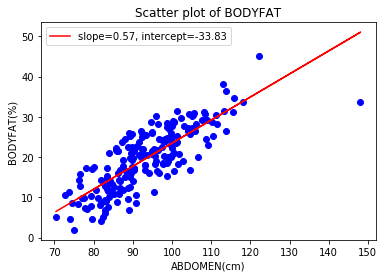

In [30]:
import matplotlib.lines as mlines
plt.plot(X_train.ABDOMEN,Y_train,'bo')
plt.plot(X_train.ABDOMEN,lm_bic.predict(sm.add_constant(X_train['ABDOMEN'])),'r')
plt.xlabel('ABDOMEN(cm)')
plt.ylabel('BODYFAT(%)')
blue_line = mlines.Line2D([], [], color='red',
                          markersize=15, label='slope=0.57, intercept=-33.83')
plt.title('Scatter plot of BODYFAT')
plt.legend(handles = [blue_line])

### Dectection of outliers and influential points

We use a specific object provided by the regression result to identify three types of outliers:

- Leverage point

For the leverage, the threshold value may be:
$$s_h=2\times \frac{k+1}{m}$$

An observation is suspicious if $h_i > s_h$
- Influential point

Influential point changes the slope (most likely also has high leverage) - run the regression with and without that point to determine.

- Outlier

Outlier is an unusual point without these special characteristics (this one likely affects the intercept only)

Method to combine "outlyingness" ($t_i$) & leverage ($h_{ii}$):

Cook's distance:

$$D_i = \sum_j\frac{(\hat{Y}_j-\hat{Y}_{j(i)})^2}{(k+1)*MSE},
D_i = \frac{\epsilon_i^2}{(k+1)*MSE}\frac{h_{ii}}{(1-h_{ii})^2}$$

Rules of thumb:

$D_i > 0.1 $ means outlier

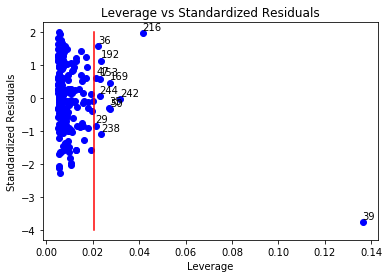

In [31]:
# leverage vs standardized residuals
v2 = 'ABDOMEN'
Y_predicted = lm_bic.predict(sm.add_constant(X_train[v2]))
residuals = Y_train - Y_predicted
std_res = (residuals-np.mean(residuals))/np.std(residuals)
X = sm.add_constant((X_train[v2]-np.mean(X_train[v2]))/np.std(X_train[v2]))
hat = X.dot(np.linalg.inv(X.T.dot(X)).dot(X.T))
hat_diag = np.diag(hat)
plt.plot(hat_diag,std_res,'bo')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.title('Leverage vs Standardized Residuals')
sh = 2*2/len(Y_train)
plt.plot([sh,sh],[-4,2], 'r')
suspicious1 = np.where(hat_diag > sh)[0]
for i in suspicious1:
    plt.text(hat_diag[i],std_res.iloc[i]+0.1,str(X_train.index[i]))

Note there is one data point (No.39) that has a high leverage  (~ 0.14) than all the other points and the absolute value of standardized residual is about 4. To identify this point: 

In [32]:
data.loc[[39]]

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
IDNO,,,,,,,,,,,,,,,
39,33.8,46,363.15,72.25,48.9,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4


The ABDOMEN of No.39 is 148.1 cm, which is the maximum value in the data set. The second maximum value (122 cm) is much smaller than the maximum value. For the linear regression model, we could identify it as an outlier which distort the outcome and accuracy of the model. Thus we remove this data point from the model.

## Step 4: Model Rebuild

In [33]:
Y_train = Y_train.drop(index=39)
X_train = X_train.drop(index=39)
lm_bic = sm.OLS(Y_train,sm.add_constant(X_train['ABDOMEN'])).fit()
print(lm_bic.summary())

                            OLS Regression Results                            
Dep. Variable:                BODYFAT   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     396.3
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           1.16e-48
Time:                        20:03:17   Log-Likelihood:                -564.90
No. Observations:                 195   AIC:                             1134.
Df Residuals:                     193   BIC:                             1140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.1553      2.911    -13.106      0.0

### Standardized Residuals vs Fitted Values

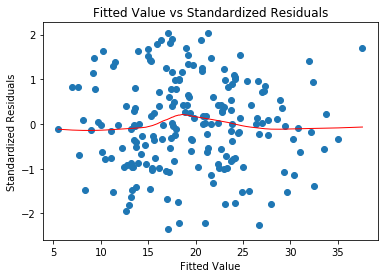

In [34]:
Y_predicted = lm_bic.predict(sm.add_constant(X_train[v2]))
residuals = Y_train - Y_predicted
std_res = (residuals-np.mean(residuals))/np.std(residuals)
plt.scatter(Y_predicted,std_res)
plt.xlabel('Fitted Value')
plt.ylabel('Standardized Residuals')
plt.title('Fitted Value vs Standardized Residuals')
from statsmodels.nonparametric.smoothers_lowess import lowess
ys = lowess(std_res,Y_predicted)
plt.plot(ys[:,0],ys[:,1],'red',linewidth=1)

The residuals fall within an area representing a horizonal band, which indicates the model assumptions of constant variance and zero error mean are correct.

### Test for error normality

One of the main assumption for the inferential part of the regression is the assumption that the errors follow a normal distribution. A first important verification is to check the compatibility of the residuals with this assumption.

- Jarque-Bera normality test

This test checks if the observed skewness and kurtosis matching a normal distribution. The p-value of the test is 0.2. Thus, we can assume that the errors are a normal distribution at the 0.05 level.

- Normal probability plot

The normal probability plot is a graphical technique to identify substantive departures from normality.

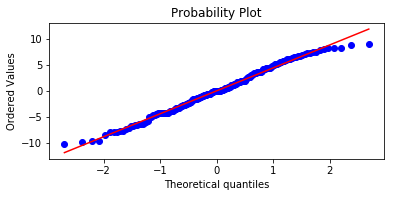

In [35]:
from scipy.stats import probplot
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = probplot(residuals, plot=ax, fit=True)

The graph confirms the Jarque-Bera test. The points are approximately aligned.

### Detection of outliers and influential points

Text(0.5, 1.0, "Cook's distance")

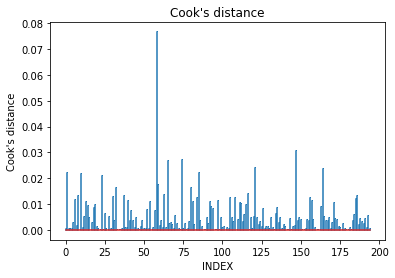

In [36]:
# Cook's distance
influence = lm_bic.get_influence()
(c,p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=',')
plt.xlabel('INDEX')
plt.ylabel('Cook\'s distance')
plt.title('Cook\'s distance')

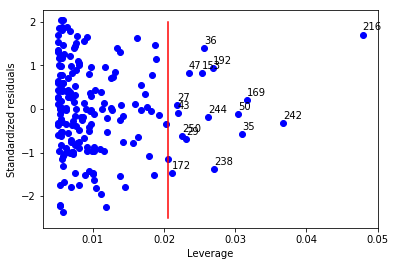

In [37]:
# re-check
X = sm.add_constant((X_train[v2]-np.mean(X_train[v2]))/np.std(X_train[v2]))
hat = X.dot(np.linalg.inv(X.T.dot(X)).dot(X.T))
hat_diag = np.diag(hat)
plt.plot(hat_diag,std_res,'bo')
plt.xlabel('Leverage')
plt.ylabel('Standardized residuals')
sh = 2*2/len(Y_train)
plt.plot([sh,sh],[-2.5,2], 'r')
suspicious1 = np.where(hat_diag > sh)[0]
for i in suspicious1:
    plt.text(hat_diag[i],std_res.iloc[i]+0.1,str(X_train.index[i]))

In [38]:
from scipy import stats
quantile = np.array([stats.percentileofscore(X_train.ABDOMEN, a, 'rank') for a in X_train.ABDOMEN])
pd.DataFrame({'ABDOMEN':X_train.iloc[suspicious1].ABDOMEN, 'quantile':quantile[suspicious1]})

,ABDOMEN,quantile
IDNO,,
169,115.9,98.974359
216,122.1,100.000000
36,113.1,96.410256
242,118.0,99.487179
238,113.8,97.948718
153,72.8,1.025641
192,113.7,97.435897
29,73.9,2.051282
244,113.4,96.923077


In this case, these data with high leverage are people with extreme but reasonable ABDOMEN values. So these data points won't be deleted. Based on the diagnostic plots above, there is no outliers and influential points in this model. And the model assumptions are correct as well.

## Step 5: Proposed Model

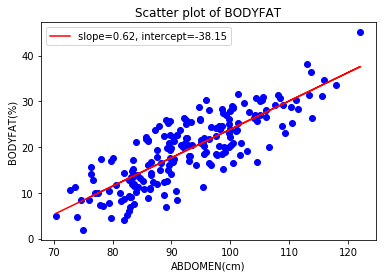

In [39]:
import matplotlib.lines as mlines
plt.plot(X_train.ABDOMEN,Y_train,'bo')
plt.plot(X_train.ABDOMEN,lm_bic.predict(sm.add_constant(X_train['ABDOMEN'])),'r')
plt.xlabel('ABDOMEN(cm)')
plt.ylabel('BODYFAT(%)')
blue_line = mlines.Line2D([], [], color='red',
                          markersize=15, label='slope=0.62, intercept=-38.15')
plt.title('Scatter plot of BODYFAT')
plt.legend(handles = [blue_line])

[Shiny App](https://songsong.shinyapps.io/stat628-module1/)

Our proposed model is we want to use abdomen to predict body fat percentage:
$$BodyFat(\%) = -38.15 + 0.62 \times ABDOMEN(cm)$$

__Possible rule of thumb__: "mutiply your ABDOMEN by 0.6, then minus 38"
- The coefficient of determination is equal to $R^2=0.67$.
- The regression is globally significant at the 0.05 level \[F-statistic = 396.3, with Prob (F-statistic) = 1.16e-48\]
- All the coefficients seem also siginificant at the 0.05 level.
- Every addtional centimeter in ABDOMEN you can expect body fat percentage to increase by an average of 0.62%

__Stengths and Weakness of Model__: I think the OLS model is a reasonable model between body fat percentage and abdomen, despite some caveats.
1. Linearity and Additivity: The expected value of dependent variable is a straight-line function of each independent variable, holding the others fixed; The slope of that line does not depend on the values of the other variables; Our proposed model only have one independent variable.
2. Statitical independence of the errors: The individuals collected in the data set are independent (no duplicate data points).
3. Homoscedasticity of the errors: It's reasonable based on the diagnostic plots.
4. Normality of the error distribution: Though there is a little tail in our QQ plot, the assumption is not violated.
5. The precision of out body fat estimation: As shown below, our proposed model follows the spotlight in real life.
6. Adjusted $R^2$ here is only about 0.67, which means this model may not have a satisfactory accuracy.

However, bodyfat percentage is a measurement of obesity. In practice, we notice that people only care about the description of body fat percentage rather than the exact value of body fat percentage. Here is a table we found on Wikipedia.

| Description | Men |
| --- | --- |
| Essential fit | 3-5% |
| Athletes | 6-13% |
| Fitness | 14-17% |
|Average|18-24%|
|Obese|25%+|

So we deicded to classify men into three levels: fitness people (bodyfat <= 17), average people (17 < bodyfat < 25) and obese people (bodyfat >= 25).

In [40]:
strong = np.where(Y_test<=17)[0]
fit = np.where((Y_test>17)&(Y_test<25))[0]
fat = np.where(Y_test>=25)[0]

In [41]:
y_true = np.empty_like(Y_test)
for i in np.arange(0,len(y_true)):
    if i in strong:
        y_true[i] = 0
    if i in fit:
        y_true[i] = 1
    if i in fat:
        y_true[i] = 2

In [42]:
y_pred = np.empty_like(Y_test)
Y_pred = lm_bic.predict(sm.add_constant(X_test[v2]))
strong1 = np.where(Y_pred<=17)[0]
fit1 = np.where((Y_pred>17)&(Y_pred<25))[0]
fat1 = np.where(Y_pred>=25)[0]
for i in np.arange(0,len(y_pred)):
    if i in strong:
        y_pred[i] = 0
    if i in fit:
        y_pred[i] = 1
    if i in fat:
        y_pred[i] = 2

In [43]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true,y_pred))

[[25  0  0]
 [ 0 18  0]
 [ 0  0  6]]


From this confusion matrix, none of these people in test set is wrongly classified according to our prediction. This result strongly proves our model is reasonable.